In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read in the arl_lookup.csv table for analysis
arls = pd.read_csv("data/arl_lookup.csv", header=0)[1:]
arls.head()

,Method,Dimension,Lambda,ARL,h,Delta,Wait,ARL_observed
1,DMEWMA,2,0.05,100,3.5425,0.25,20,45.204251
2,DMEWMA,2,0.05,100,3.5425,0.25,50,45.836393
3,DMEWMA,2,0.05,100,3.5425,0.25,100,45.916057
4,DMEWMA,2,0.05,100,3.5425,0.25,500,45.520468
5,DMEWMA,2,0.05,100,3.5425,0.50,20,22.510701


In [3]:
"""
First a function that takes in an input data frame,
method, dimension, target arl, and wait time and returns
a plot the groups by lambda and displays arl_observed
vs size of shift
"""

def lambdaPerformanceDF( df, method, dim, tar, wt):
    comp_df = df[(df["Method"] == method) &
                 (df["Dimension"] == dim) &
                 (df["ARL"] == tar) &
                 (df["Wait"] == wt) &
                 (df["Lambda"] <= 0.8)]
    
    return comp_df

In [4]:
def lambdaPerformancePlot(df,**kwargs):
    if kwargs.get("ax"):
        g = sns.lineplot(data=df,
                     ax=kwargs.get("ax"),
                     x="Delta",
                     y="ARL_observed",
                     style="Lambda",
                     palette="gray",
                     color="gray"
                    )       
    else:
        g = sns.lineplot(data=df,
                     x="Delta",
                     y="ARL_observed",
                     style="Lambda",
                     palette="gray",
                     color="gray"
                    )

    return g

<AxesSubplot:xlabel='Delta', ylabel='ARL_observed'>

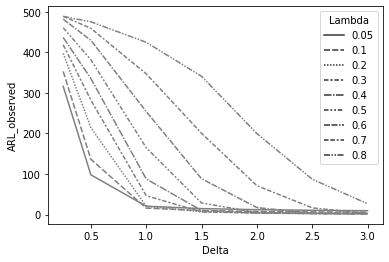

In [5]:
lambdaPerformancePlot(lambdaPerformanceDF(arls, "ssDMEWMA", 2, 500, 50))

In [6]:
"""
Now need a second function that illustrates convergence to the DMEWMA
"""


def convergenceDF(df, methods, dim, tar, lamdas, wt):
    conf_df = df[(df["Method"].isin(methods)) &
                 (df["Dimension"] == dim) &
                 (df["ARL"] == tar) &
                 (df["Lambda"].isin(lamdas)) &
                 (df["Wait"] == wt)]
    
    return conf_df

In [7]:
def convergencePlot(df,**kwargs):
    if kwargs.get("ax"):
        g = sns.lineplot(data=df,
                         ax=kwargs.get("ax"),
                     x="Delta",
                     y="ARL_observed",
                     hue="Method",
                     style="Lambda",
                     palette="gray"
                    )
        
    else:
        g = sns.lineplot(data=df,
                     x="Delta",
                     y="ARL_observed",
                     hue="Method",
                     style="Lambda",
                     palette="gray"
                    )

    return g

<AxesSubplot:xlabel='Delta', ylabel='ARL_observed'>

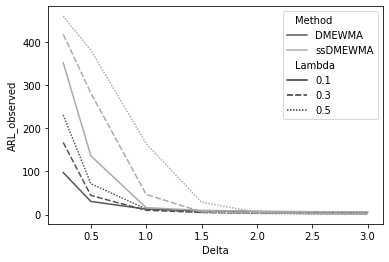

In [8]:
convergencePlot(convergenceDF(arls,["ssDMEWMA", "DMEWMA"], 2, 500, [0.1,0.3,0.5], 50))

In [9]:
"""
Need to write a function that takes an input data frame,
methods, dimension, lambdas, target arl, shift and
returns a plot showing how the methods compare (line
color and line types) over wait time
"""

def waitComparisonDF( df, methods, dim, lamdas, tar, deltas ):
    comp_df = df[(df["Method"].isin(methods)) &
                 (df["Dimension"] == dim) &
                 (df["Lambda"].isin(lamdas)) &
                 (df["ARL"] == tar) &
                 (df["Delta"].isin(deltas)) 
                 ]

    return comp_df


In [10]:
def waitComparison(df,**kwargs):
    if kwargs.get("ax"):   
        g = sns.lineplot(data=df,
                         ax=kwargs.get("ax"),
                     x="Wait",
                     y="ARL_observed",
                     hue="Method",
                     style="Lambda",
                     palette="gray"
                    )
    else:
         g = sns.lineplot(data=df,
                     x="Wait",
                     y="ARL_observed",
                     hue="Method",
                     style="Lambda",
                     palette="gray"
                    )


    return g

<AxesSubplot:xlabel='Wait', ylabel='ARL_observed'>

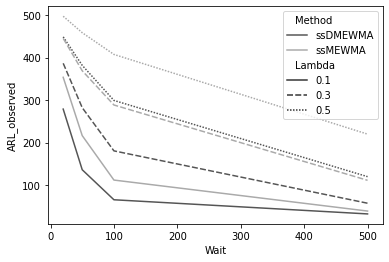

In [11]:
# A sample plot without loss of generality
waitComparison(waitComparisonDF(arls, ["ssDMEWMA", "ssMEWMA"], 2, [0.1,0.3,0.5], 500, [0.5]))

In [12]:
"""
Need to write a function that takes an input data frame,
dimension, lambdas, target arl, shift and
returns a plot showing how the methods compare (line
color and line types) over shift size
"""

def shiftComparisonDF( df, methods, dim, lamdas, tar, wt ):
    
    comp_df = df[(df["Method"].isin(methods)) &
                 (df["Dimension"] == dim) &
                 (df["Lambda"].isin(lamdas)) &
                 (df["ARL"] == tar) &
                 (df["Wait"] == wt)
                 ]
    
    return comp_df


In [13]:
def shiftComparison(df,**kwargs):
    if kwargs.get("ax"): 
        g = sns.lineplot(data=df,
                         ax=kwargs.get("ax"),
                         x="Delta",
                         y="ARL_observed",
                         hue="Method",
                         style="Lambda",
                         palette="gray"
                        )
    else:
        g = sns.lineplot(data=df,
                         x="Delta",
                         y="ARL_observed",
                         hue="Method",
                         style="Lambda",
                         palette="gray"
                        )  
        
    return g

<AxesSubplot:xlabel='Delta', ylabel='ARL_observed'>

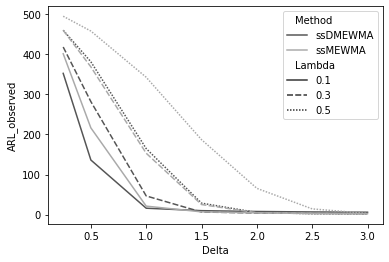

In [14]:
# A sample plot without loss of generality
shiftComparison(shiftComparisonDF(arls, ["ssDMEWMA", "ssMEWMA"], 2, [0.1, 0.3, 0.5], 500, 50))

In [15]:
"""
Now just neeed a master function that takes the necessary 
inputs to generate the previous 4 function's graphs into
a single master plot for export
"""

def analysisPlotter(df=arls, methods = ["ssDMEWMA", "ssMEWMA"], 
                    dim=2, tar=500, wt=50,
                    conv_methods= ["ssDMEWMA", "DMEWMA"], 
                    lamdas=[0.1,0.3,0.5],
                    deltas=[0.5],
                    **kwargs):
    
    # now arrange them into a 2
    fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharey=True)
    
    # lambda performance plot, assumes the first element in "methods" is to be plotted
    lambdaPerformancePlot(lambdaPerformanceDF( df=df,
                                               method=methods[0], 
                                               dim=dim, 
                                               tar=tar, 
                                               wt=wt),
                          ax=axes[0,0])
    
    # convergence plot
    convergencePlot(convergenceDF( df=df,
                                   methods=conv_methods, 
                                   dim=dim, 
                                   tar=tar, 
                                   lamdas=lamdas, 
                                   wt=wt),
                    ax=axes[0,1])

    # shift comparison 
    shiftComparison(shiftComparisonDF( df=df, 
                                       methods=methods, 
                                       dim=dim, 
                                       lamdas=lamdas, 
                                       tar=tar, 
                                       wt=wt),
                   ax=axes[1,0])    
    
    # wait plot
    waitComparison(waitComparisonDF( df=df,
                                     methods=methods,
                                     dim=dim, 
                                     lamdas=lamdas, 
                                     tar=tar, 
                                     deltas=deltas),
                  ax=axes[1,1])
    
    
    axes[0,0].set(xlabel="Shift",
                  ylabel="O.O.C ARL")
    
    axes[0,1].set(xlabel="Shift",
                  ylabel = "O.O.C ARL")

    axes[1,0].set(xlabel="Shift",
                  ylabel = "O.O.C ARL")    

    axes[1,1].set(xlabel="In Control Period",
                  ylabel = "O.O.C ARL")     
    
    return fig

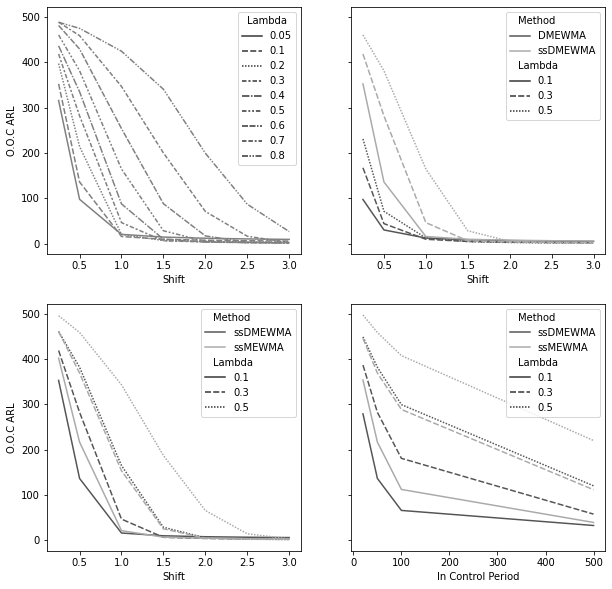

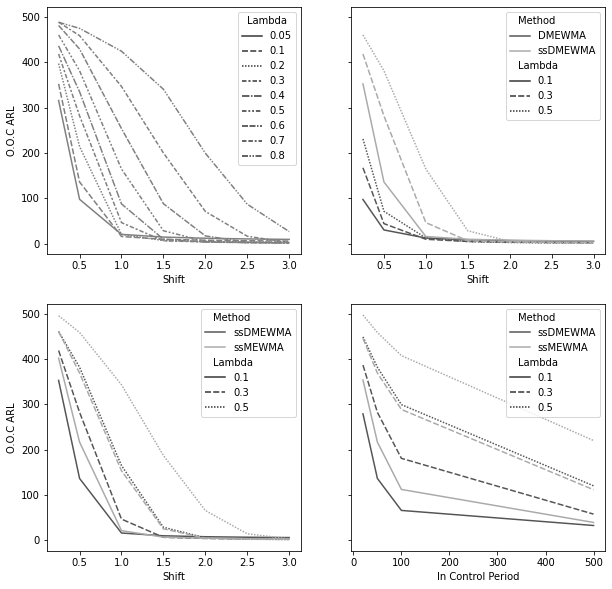

In [16]:
# Default behavior

analysisPlotter()

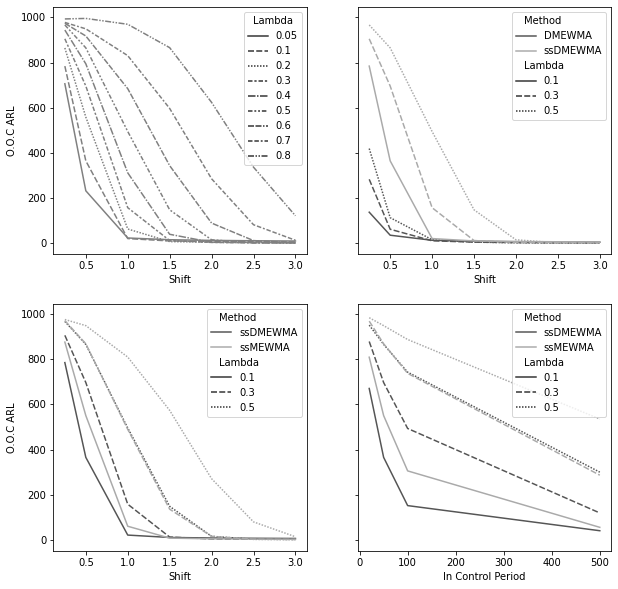

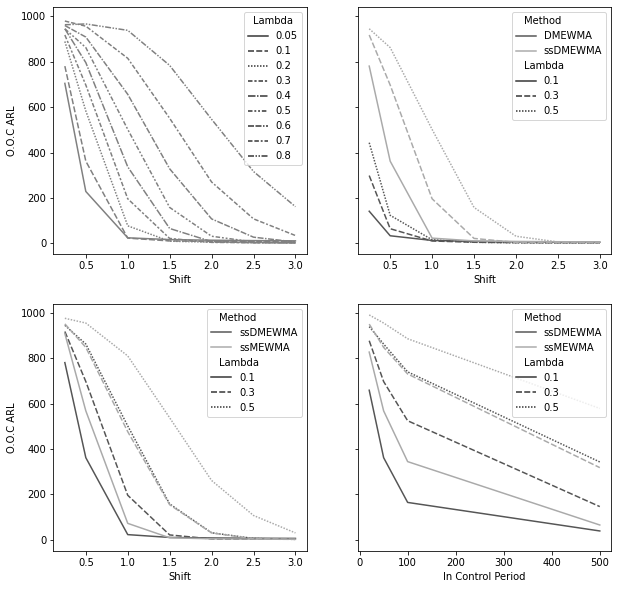

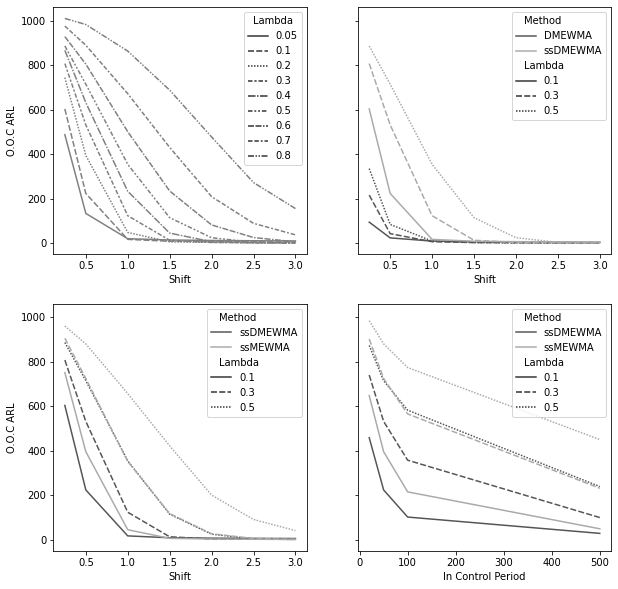

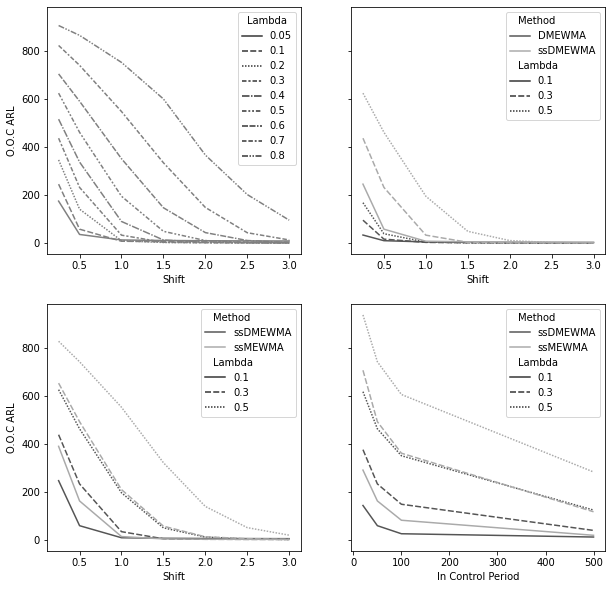

In [17]:
# lets repeat for dimensions 5, 10, 25
for i in (2,5,10,25):
    f = analysisPlotter(dim=i, tar=1000)
    f.savefig("ssDMEWMA_"+str(i)+".png")
    

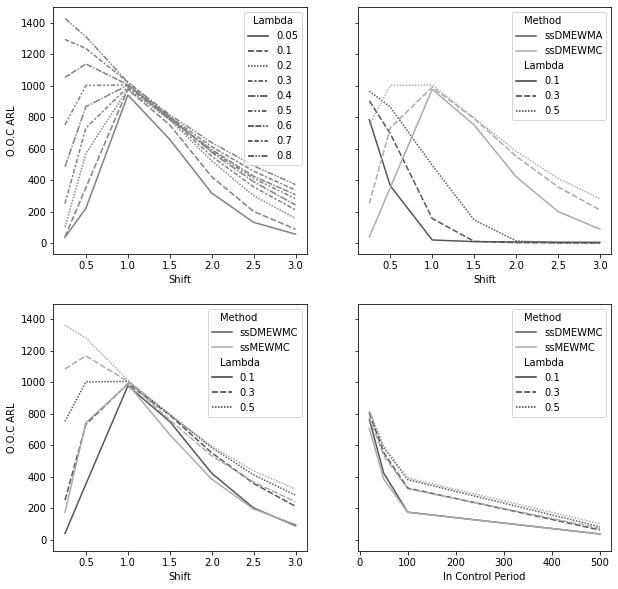

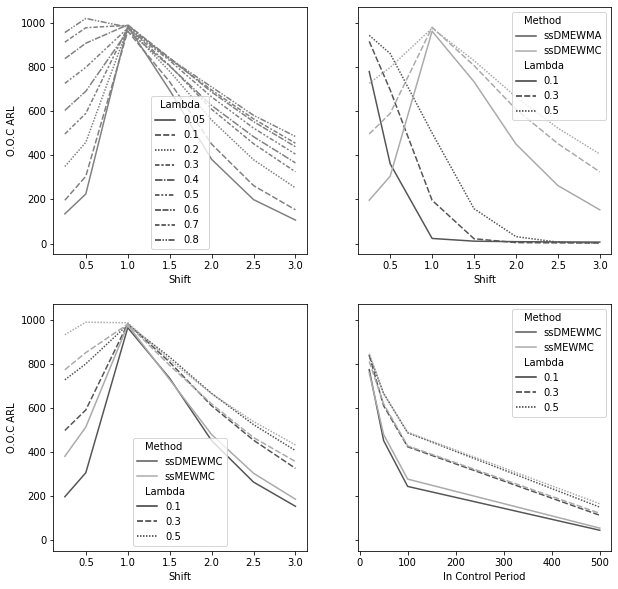

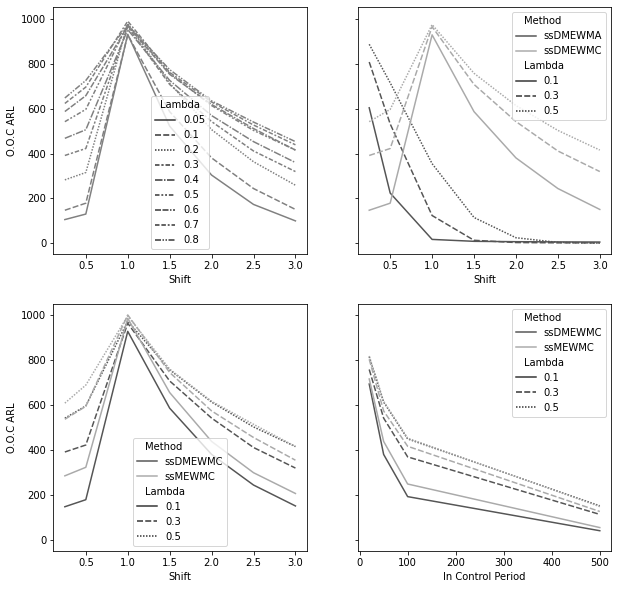

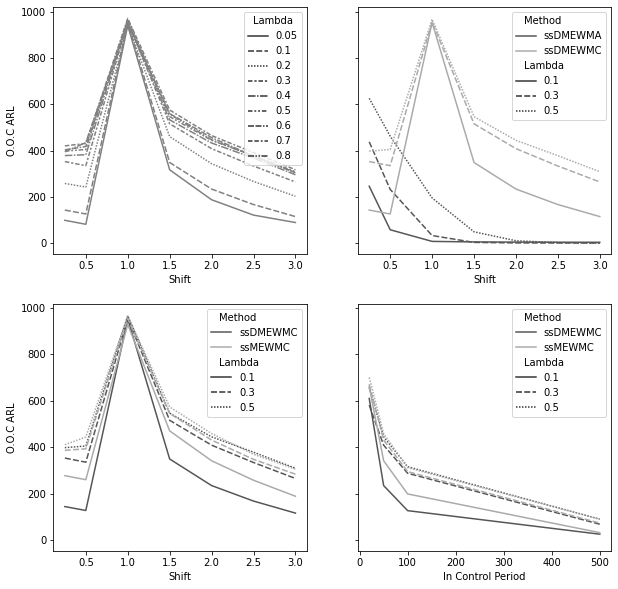

In [18]:
# lets repeat for dimensions 2, 5, 10, 25 but the ssDMEWMC
for i in (2,5,10,25):
    f = analysisPlotter(dim=i, tar=1000, methods=["ssDMEWMC", "ssMEWMC"], conv_methods=["ssDMEWMC", "ssDMEWMA"], deltas=[2.0])
    f.savefig("ssDMEWMC_"+str(i)+".png")

In [19]:
"""
Now just to write some functions that take two methods to compare,
control for shift and in control periods, and returns a -1 when
method 1 outperforms method 2, a 0 when they are equivalents, and
a 1 when method 2 outperforms method 1
"""
def is_smaller(num1, num2):
    if num1 < num2:
        return -1
    elif num2 < num1:
        return 1
    elif num1 == num2 :
        return 0
    else:
        return np.nan
    
is_smaller_vectorized = np.vectorize(is_smaller)


def compMatrixBuilder(df, methods, tar, delt, wt):
    #grab the relevant data from the parent data frame for method 1, arl, shift, and wait
    meth1 = df[(df["Method"] == methods[0]) &
               (df["ARL"] == tar) &
               (df["Delta"] == delt) &
               (df["Wait"] == wt)].drop(["Method", "ARL", "h", "Delta", "Wait"], axis = 1)
    
    #grab the relevant data from the parent data frame for method 2, arl, shift, and wait
    meth2 = df[(df["Method"] == methods[1]) &
               (df["ARL"] == tar) &
               (df["Delta"] == delt) &
               (df["Wait"] == wt)].drop(["Method", "ARL", "h", "Delta", "Wait"], axis = 1)
    
    # now join the two data frames together on Dimension and Lambda
    comp_df = meth1.merge(meth2, on=["Dimension", "Lambda"])
    
    # now create a new column to determin which arl is smallest
    comp_df["Performance"] = is_smaller_vectorized(comp_df["ARL_observed_x"], comp_df["ARL_observed_y"])
    
    comp_df = comp_df.drop(["ARL_observed_x","ARL_observed_y"], axis = 1)
    
    comp_df_wide = pd.pivot_table(comp_df, index='Dimension',columns=['Lambda'],values='Performance')
    
    return comp_df_wide.to_numpy()

In [20]:
compMatrixBuilder(arls, ["ssDMEWMA", "ssMEWMA"], 1000, 0.5, 50)

array([[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1]])

In [21]:
def compMatrixPlotter(mat, tit):
    [m,n] = np.shape(mat)

    #Colour Map using Matrix
    plt.imshow(mat, alpha=0.8, cmap="Greys_r")
    plt.xticks(np.arange(n))
    plt.yticks(np.arange(m))
    plt.xlabel('Lambda')
    plt.ylabel('Dimension')
    plt.title(tit)

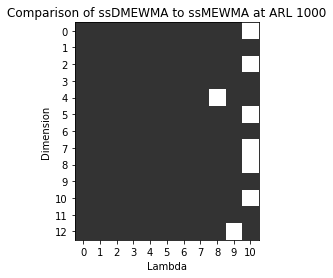

In [22]:
compMatrixPlotter(compMatrixBuilder(arls, ["ssDMEWMA", "ssMEWMA"], 1000, 0.5, 50), "Comparison of ssDMEWMA to ssMEWMA at ARL 1000")

In [23]:
def exhaustivePlotter(df=arls, methods = ["ssDMEWMA", "ssMEWMA"], arls=[100,500,1000,2000],
                      tar=500, wt=50,**kwargs):
    
    # now arrange them into a 2
    fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharey=True)
    
    plt.subplot(2,2,1)
    compMatrixPlotter(compMatrixBuilder(exhaustive_df, ["ssDMEWMA", "ssMEWMA"], arls[0], 0.5, 50), methods[0] + " vs " + methods[1] + " at ARL "+ str(arls[0]))
    
    plt.subplot(2,2,2)
    compMatrixPlotter(compMatrixBuilder(exhaustive_df, ["ssDMEWMA", "ssMEWMA"], arls[1], 0.5, 50), methods[0] + " vs " + methods[1] + " at ARL "+ str(arls[1]))
    
    plt.subplot(2,2,3)
    compMatrixPlotter(compMatrixBuilder(exhaustive_df, ["ssDMEWMA", "ssMEWMA"], arls[2], 0.5, 50), methods[0] + " vs " + methods[1] + " at ARL "+ str(arls[2]))
            
    plt.subplot(2,2,4)    
    compMatrixPlotter(compMatrixBuilder(exhaustive_df, ["ssDMEWMA", "ssMEWMA"], arls[3], 0.5, 50), methods[0] + " vs " + methods[1] + " at ARL "+ str(arls[3]))

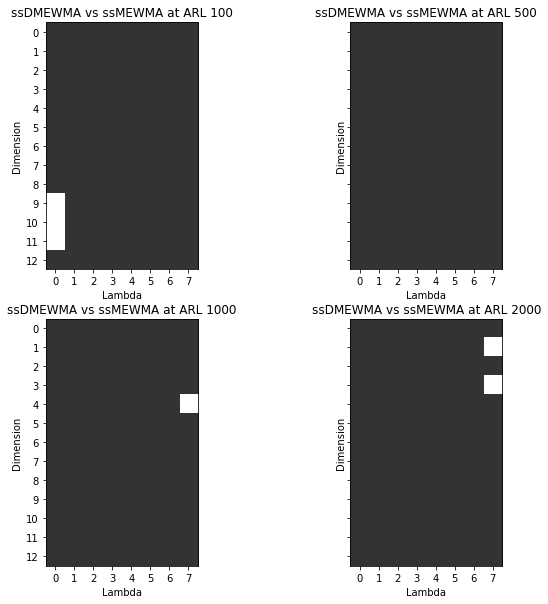

In [24]:
# now just need to do the compilation of these plots for ARLs 100, 500, 1000, 2000

exhaustive_df = arls[(arls["ARL"].isin([100,500,1000,2000])) &
                     (arls["Lambda"].isin([0.05,0.10,0.20,0.30,0.40,0.50,0.60,0.80]))]

exhaustivePlotter(exhaustive_df)

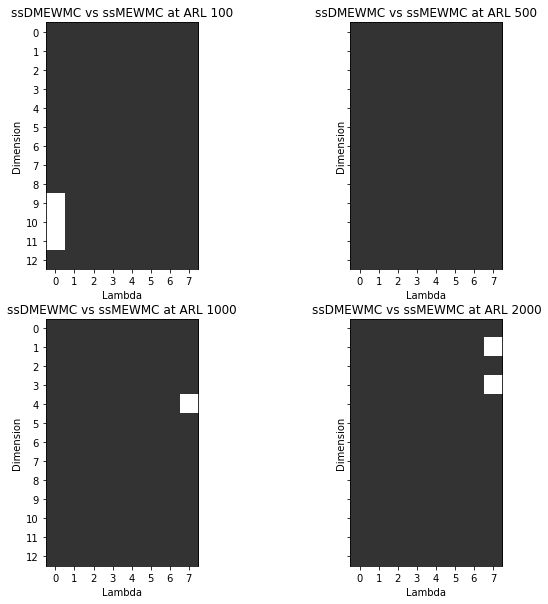

In [25]:
exhaustivePlotter(exhaustive_df, methods = ["ssDMEWMC", "ssMEWMC"])